In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time
import math

In [2]:
dataset = pd.read_csv("Downloads\SR, SD, T, WD, WS(2014-2015).csv")
dataset

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,BG1,SOLR,01/01/2014 00:00,NaN,W/m2,P
1,BG1,SOLR,01/01/2014 00:15,0.0,W/m2,P
2,BG1,SOLR,01/01/2014 00:30,0.0,W/m2,P
3,BG1,SOLR,01/01/2014 00:45,0.0,W/m2,P
4,BG1,SOLR,01/01/2014 01:00,0.0,W/m2,P
...,...,...,...,...,...,...
175195,BG1,WSPD,31/12/2014 22:45,3.1,m/s,P
175196,BG1,WSPD,31/12/2014 23:00,2.4,m/s,P
175197,BG1,WSPD,31/12/2014 23:15,2.5,m/s,P
175198,BG1,WSPD,31/12/2014 23:30,2.9,m/s,P


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175200 entries, 0 to 175199
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Site                     175200 non-null  object 
 1   Species                  175200 non-null  object 
 2   ReadingDateTime          175200 non-null  object 
 3   Value                    129897 non-null  float64
 4   Units                    175200 non-null  object 
 5   Provisional or Ratified  175200 non-null  object 
dtypes: float64(1), object(5)
memory usage: 8.0+ MB


In [4]:
dataset.isna().sum()

Site                           0
Species                        0
ReadingDateTime                0
Value                      45303
Units                          0
Provisional or Ratified        0
dtype: int64

In [5]:
dataset = pd.concat([dataset, pd.read_csv("Downloads\BP, NO, ND, ON, R, RH(2014-2015).csv")])
dataset = pd.concat([dataset, pd.read_csv("Downloads\SR, SD, T, WD, WS(2015-2016).csv")])
dataset = pd.concat([dataset, pd.read_csv("Downloads\BP, NO, ND, ON, R, RH(2015-2016).csv")])
dataset = pd.concat([dataset, pd.read_csv("Downloads\SR, SD, T, WD, WS(2016-2017).csv")])
dataset = pd.concat([dataset, pd.read_csv("Downloads\BP, NO, ND, ON, R, RH(2016-2017).csv")])
dataset = pd.concat([dataset, pd.read_csv("Downloads\SR, SD, T, WD, WS(2017-2018).csv")])
dataset = pd.concat([dataset, pd.read_csv("Downloads\BP, NO, ND, ON, R, RH(2017-2018).csv")])
dataset = pd.concat([dataset, pd.read_csv("Downloads\SR, SD, T, WD, WS(2018-2019).csv")])
dataset = pd.concat([dataset, pd.read_csv("Downloads\BP, NO, ND, ON, R, RH(2018-2019).csv")])

dataset['Species'].value_counts()

SOLR    175296
SO2     175296
TMP     175296
WDIR    175296
WSPD    175296
BP      175296
NO      175296
NO2     175296
NOX     175296
RAIN    175296
RHUM    175296
Name: Species, dtype: int64

In [6]:
dataset

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,BG1,SOLR,01/01/2014 00:00,NaN,W/m2,P
1,BG1,SOLR,01/01/2014 00:15,0.0,W/m2,P
2,BG1,SOLR,01/01/2014 00:30,0.0,W/m2,P
3,BG1,SOLR,01/01/2014 00:45,0.0,W/m2,P
4,BG1,SOLR,01/01/2014 01:00,0.0,W/m2,P
...,...,...,...,...,...,...
210235,BG1,RHUM,31/12/2018 22:45,NaN,%,P
210236,BG1,RHUM,31/12/2018 23:00,NaN,%,P
210237,BG1,RHUM,31/12/2018 23:15,NaN,%,P
210238,BG1,RHUM,31/12/2018 23:30,NaN,%,P


In [7]:
dataset.isna().sum()

Site                            0
Species                         0
ReadingDateTime                 0
Value                      565926
Units                           0
Provisional or Ratified         0
dtype: int64

In [8]:
dataset["ReadingDateTime"] = dataset["ReadingDateTime"].astype("datetime64")
dataset = dataset.set_index("ReadingDateTime")
dataset

,Site,Species,Value,Units,Provisional or Ratified
ReadingDateTime,,,,,
2014-01-01 00:00:00,BG1,SOLR,NaN,W/m2,P
2014-01-01 00:15:00,BG1,SOLR,0.0,W/m2,P
2014-01-01 00:30:00,BG1,SOLR,0.0,W/m2,P
2014-01-01 00:45:00,BG1,SOLR,0.0,W/m2,P
2014-01-01 01:00:00,BG1,SOLR,0.0,W/m2,P
...,...,...,...,...,...
2018-12-31 22:45:00,BG1,RHUM,NaN,%,P
2018-12-31 23:00:00,BG1,RHUM,NaN,%,P
2018-12-31 23:15:00,BG1,RHUM,NaN,%,P


In [9]:
dataframe = dataset.copy()
dataframe.drop(['Site', 'Units', 'Provisional or Ratified'], axis = 1)

,Species,Value
ReadingDateTime,,
2014-01-01 00:00:00,SOLR,NaN
2014-01-01 00:15:00,SOLR,0.0
2014-01-01 00:30:00,SOLR,0.0
2014-01-01 00:45:00,SOLR,0.0
2014-01-01 01:00:00,SOLR,0.0
...,...,...
2018-12-31 22:45:00,RHUM,NaN
2018-12-31 23:00:00,RHUM,NaN
2018-12-31 23:15:00,RHUM,NaN


In [10]:
dataframe['Species'].value_counts()

SOLR    175296
SO2     175296
TMP     175296
WDIR    175296
WSPD    175296
BP      175296
NO      175296
NO2     175296
NOX     175296
RAIN    175296
RHUM    175296
Name: Species, dtype: int64

In [11]:
dataframeA = dataframe.pivot(columns = 'Species', values = 'Value')
dataframeA

Species,BP,NO,NO2,NOX,RAIN,RHUM,SO2,SOLR,TMP,WDIR,WSPD
ReadingDateTime,,,,,,,,,,,
2014-01-01 00:00:00,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 00:15:00,997.0,NaN,NaN,NaN,0.0,NaN,2.4,0.0,NaN,187.0,4.9
2014-01-01 00:30:00,997.0,NaN,NaN,NaN,0.0,NaN,2.4,0.0,NaN,192.0,3.5
2014-01-01 00:45:00,997.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,209.0,3.5
2014-01-01 01:00:00,997.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,203.0,3.2
...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 22:45:00,1029.0,NaN,NaN,NaN,0.0,NaN,-0.6,5.0,10.0,282.0,NaN
2018-12-31 23:00:00,1029.0,NaN,NaN,NaN,0.0,NaN,2.3,5.0,10.0,282.0,NaN
2018-12-31 23:15:00,1029.0,NaN,NaN,NaN,0.0,NaN,2.3,5.0,10.0,272.0,NaN


In [12]:
def checkAllZero(dataframe):
    data = dataframe.copy()
    rows_to_delete = list()
    for index, row in data.iterrows():
        for i in range(11):
            if row.isna().sum() == 11:
                rows_to_delete.append(index)
    data = data.drop(index = rows_to_delete)
    return data

In [13]:
dataframeB = checkAllZero(dataframeA)
dataframeB

Species,BP,NO,NO2,NOX,RAIN,RHUM,SO2,SOLR,TMP,WDIR,WSPD
ReadingDateTime,,,,,,,,,,,
2014-01-01 00:00:00,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 00:15:00,997.0,NaN,NaN,NaN,0.0,NaN,2.4,0.0,NaN,187.0,4.9
2014-01-01 00:30:00,997.0,NaN,NaN,NaN,0.0,NaN,2.4,0.0,NaN,192.0,3.5
2014-01-01 00:45:00,997.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,209.0,3.5
2014-01-01 01:00:00,997.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,203.0,3.2
...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 22:45:00,1029.0,NaN,NaN,NaN,0.0,NaN,-0.6,5.0,10.0,282.0,NaN
2018-12-31 23:00:00,1029.0,NaN,NaN,NaN,0.0,NaN,2.3,5.0,10.0,282.0,NaN
2018-12-31 23:15:00,1029.0,NaN,NaN,NaN,0.0,NaN,2.3,5.0,10.0,272.0,NaN


In [14]:
def deleteAlmostEmptyColumn(dataframe):
    data = dataframe.copy()
    columns_to_drop = list()
    for i in data.columns:
        if data[i].isna().sum() > data.shape[0]//2:
            columns_to_drop.append(i)
    data = data.drop(columns = columns_to_drop, axis = 1)
    return data

In [15]:
dataframeC = deleteAlmostEmptyColumn(dataframeB)
dataframeC

Species,BP,NO,NO2,NOX,RAIN,SO2,SOLR,WDIR,WSPD
ReadingDateTime,,,,,,,,,
2014-01-01 00:00:00,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2014-01-01 00:15:00,997.0,NaN,NaN,NaN,0.0,2.4,0.0,187.0,4.9
2014-01-01 00:30:00,997.0,NaN,NaN,NaN,0.0,2.4,0.0,192.0,3.5
2014-01-01 00:45:00,997.0,NaN,NaN,NaN,0.0,NaN,0.0,209.0,3.5
2014-01-01 01:00:00,997.0,NaN,NaN,NaN,0.0,NaN,0.0,203.0,3.2
...,...,...,...,...,...,...,...,...,...
2018-12-31 22:45:00,1029.0,NaN,NaN,NaN,0.0,-0.6,5.0,282.0,NaN
2018-12-31 23:00:00,1029.0,NaN,NaN,NaN,0.0,2.3,5.0,282.0,NaN
2018-12-31 23:15:00,1029.0,NaN,NaN,NaN,0.0,2.3,5.0,272.0,NaN


In [16]:
species = ['BP','NO','NO2','NOX','RAIN','SO2','SOLR','WDIR','WSPD']
def convertNegativeValueToNaN(dataframe):
    data = dataframe.copy()
    for index, row in data.iterrows():
        for i in range(9):
            if row[species[i]] < 0:
                row[species[i]] = np.nan
    return data

In [17]:
dataframeD = convertNegativeValueToNaN(dataframeC)
dataframeD

Species,BP,NO,NO2,NOX,RAIN,SO2,SOLR,WDIR,WSPD
ReadingDateTime,,,,,,,,,
2014-01-01 00:00:00,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2014-01-01 00:15:00,997.0,NaN,NaN,NaN,0.0,2.4,0.0,187.0,4.9
2014-01-01 00:30:00,997.0,NaN,NaN,NaN,0.0,2.4,0.0,192.0,3.5
2014-01-01 00:45:00,997.0,NaN,NaN,NaN,0.0,NaN,0.0,209.0,3.5
2014-01-01 01:00:00,997.0,NaN,NaN,NaN,0.0,NaN,0.0,203.0,3.2
...,...,...,...,...,...,...,...,...,...
2018-12-31 22:45:00,1029.0,NaN,NaN,NaN,0.0,NaN,5.0,282.0,NaN
2018-12-31 23:00:00,1029.0,NaN,NaN,NaN,0.0,2.3,5.0,282.0,NaN
2018-12-31 23:15:00,1029.0,NaN,NaN,NaN,0.0,2.3,5.0,272.0,NaN


In [18]:
dataframeD.interpolate(method = 'linear', axis = 0, limit_direction = 'both', inplace = True)
dataframeD

Species,BP,NO,NO2,NOX,RAIN,SO2,SOLR,WDIR,WSPD
ReadingDateTime,,,,,,,,,
2014-01-01 00:00:00,997.0,0.1,15.1,15.2,0.0,2.4,0.0,187.0,4.9
2014-01-01 00:15:00,997.0,0.1,15.1,15.2,0.0,2.4,0.0,187.0,4.9
2014-01-01 00:30:00,997.0,0.1,15.1,15.2,0.0,2.4,0.0,192.0,3.5
2014-01-01 00:45:00,997.0,0.1,15.1,15.2,0.0,2.4,0.0,209.0,3.5
2014-01-01 01:00:00,997.0,0.1,15.1,15.2,0.0,2.4,0.0,203.0,3.2
...,...,...,...,...,...,...,...,...,...
2018-12-31 22:45:00,1029.0,0.0,3.9,3.9,0.0,2.3,5.0,282.0,0.2
2018-12-31 23:00:00,1029.0,0.0,3.9,3.9,0.0,2.3,5.0,282.0,0.2
2018-12-31 23:15:00,1029.0,0.0,3.9,3.9,0.0,2.3,5.0,272.0,0.2


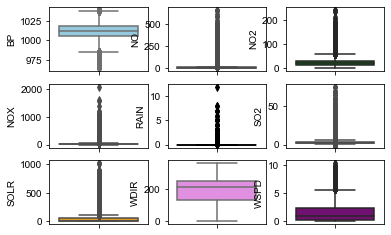

In [19]:
figure, axis = plt.subplots(3,3)
plt.rcParams['figure.figsize'] = (12,12)
sns.set_style('whitegrid')

sns.boxplot(y = dataframeD['BP'], ax = axis[0,0], color = 'skyblue')
sns.boxplot(y = dataframeD['NO'], ax = axis[0,1], color = 'red')
sns.boxplot(y = dataframeD['NO2'], ax = axis[0,2], color = 'green')
sns.boxplot(y = dataframeD['NOX'], ax = axis[1,0], color = 'yellow')
sns.boxplot(y = dataframeD['RAIN'], ax = axis[1,1], color = 'black')
sns.boxplot(y = dataframeD['SO2'], ax = axis[1,2], color = 'red')
sns.boxplot(y = dataframeD['SOLR'], ax = axis[2,0], color = 'orange')
sns.boxplot(y = dataframeD['WDIR'], ax = axis[2,1], color = 'violet')
sns.boxplot(y = dataframeD['WSPD'], ax = axis[2,2], color = 'purple')
plt.show()

In [20]:
def removeOutliers(dataframe):
    data = dataframe.copy()
    for name in species:
        value = np.array(data[name])
        values = sorted(value)
        Q1 = np.quantile(values, 0.25)
        Q3 = np.quantile(values, 0.75)
        IQR = Q3-Q1
        array = list(np.where(((value < (Q1 - 1.5 * IQR)) |(value > (Q3 + 1.5 * IQR))), np.nan, value))
        data[name] = array
    return data

In [21]:
dataframeE = removeOutliers(dataframeD)
dataframeE

Species,BP,NO,NO2,NOX,RAIN,SO2,SOLR,WDIR,WSPD
ReadingDateTime,,,,,,,,,
2014-01-01 00:00:00,997.0,0.1,15.1,15.2,0.0,2.4,0.0,187.0,4.9
2014-01-01 00:15:00,997.0,0.1,15.1,15.2,0.0,2.4,0.0,187.0,4.9
2014-01-01 00:30:00,997.0,0.1,15.1,15.2,0.0,2.4,0.0,192.0,3.5
2014-01-01 00:45:00,997.0,0.1,15.1,15.2,0.0,2.4,0.0,209.0,3.5
2014-01-01 01:00:00,997.0,0.1,15.1,15.2,0.0,2.4,0.0,203.0,3.2
...,...,...,...,...,...,...,...,...,...
2018-12-31 22:45:00,1029.0,0.0,3.9,3.9,0.0,2.3,5.0,282.0,0.2
2018-12-31 23:00:00,1029.0,0.0,3.9,3.9,0.0,2.3,5.0,282.0,0.2
2018-12-31 23:15:00,1029.0,0.0,3.9,3.9,0.0,2.3,5.0,272.0,0.2


In [22]:
dataframeE.interpolate(method = 'linear', axis = 0, limit_direction = 'both', inplace = True)
dataframeE

Species,BP,NO,NO2,NOX,RAIN,SO2,SOLR,WDIR,WSPD
ReadingDateTime,,,,,,,,,
2014-01-01 00:00:00,997.0,0.1,15.1,15.2,0.0,2.4,0.0,187.0,4.9
2014-01-01 00:15:00,997.0,0.1,15.1,15.2,0.0,2.4,0.0,187.0,4.9
2014-01-01 00:30:00,997.0,0.1,15.1,15.2,0.0,2.4,0.0,192.0,3.5
2014-01-01 00:45:00,997.0,0.1,15.1,15.2,0.0,2.4,0.0,209.0,3.5
2014-01-01 01:00:00,997.0,0.1,15.1,15.2,0.0,2.4,0.0,203.0,3.2
...,...,...,...,...,...,...,...,...,...
2018-12-31 22:45:00,1029.0,0.0,3.9,3.9,0.0,2.3,5.0,282.0,0.2
2018-12-31 23:00:00,1029.0,0.0,3.9,3.9,0.0,2.3,5.0,282.0,0.2
2018-12-31 23:15:00,1029.0,0.0,3.9,3.9,0.0,2.3,5.0,272.0,0.2


In [23]:
dataframeE.isna().sum()

Species
BP      0
NO      0
NO2     0
NOX     0
RAIN    0
SO2     0
SOLR    0
WDIR    0
WSPD    0
dtype: int64

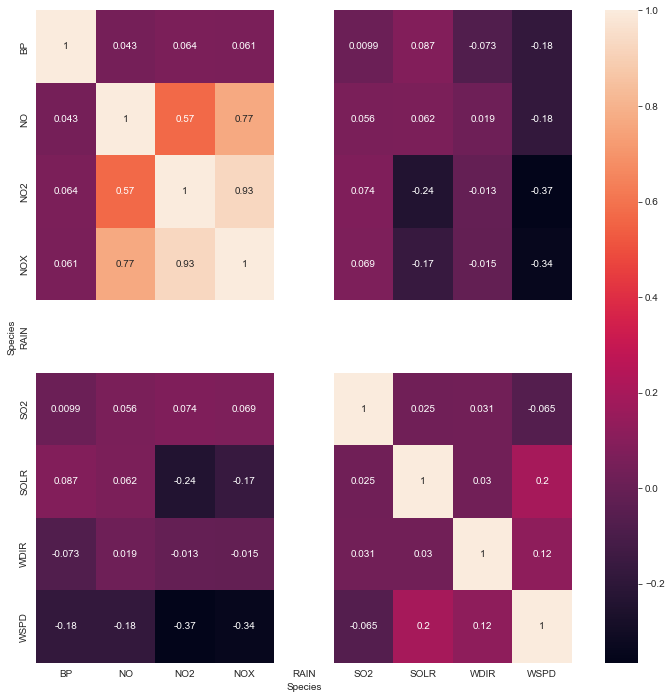

In [24]:
dataplot = sns.heatmap(dataframeE.corr(method = 'pearson'), annot = True)
plt.show()

In [25]:
dataframeE.corr()

Species,BP,NO,NO2,NOX,RAIN,SO2,SOLR,WDIR,WSPD
Species,,,,,,,,,
BP,1.000000,0.042849,0.064244,0.060559,NaN,0.009943,0.087372,-0.072927,-0.182322
NO,0.042849,1.000000,0.568252,0.766588,NaN,0.056014,0.061641,0.018941,-0.183168
NO2,0.064244,0.568252,1.000000,0.929656,NaN,0.074404,-0.241591,-0.013308,-0.365503
NOX,0.060559,0.766588,0.929656,1.000000,NaN,0.068885,-0.166832,-0.015460,-0.344087
RAIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SO2,0.009943,0.056014,0.074404,0.068885,NaN,1.000000,0.025149,0.030666,-0.064511
SOLR,0.087372,0.061641,-0.241591,-0.166832,NaN,0.025149,1.000000,0.029666,0.198295
WDIR,-0.072927,0.018941,-0.013308,-0.015460,NaN,0.030666,0.029666,1.000000,0.122282
WSPD,-0.182322,-0.183168,-0.365503,-0.344087,NaN,-0.064511,0.198295,0.122282,1.000000


NaN in this case is because of all zero values in RAIN column.

In [26]:
dataframeE["RAIN"].isna().sum(), (dataframeE['RAIN']==0).all()

(0, True)

In [27]:
dataframeF = dataframeE.drop(columns = ['RAIN'])
dataframeF

Species,BP,NO,NO2,NOX,SO2,SOLR,WDIR,WSPD
ReadingDateTime,,,,,,,,
2014-01-01 00:00:00,997.0,0.1,15.1,15.2,2.4,0.0,187.0,4.9
2014-01-01 00:15:00,997.0,0.1,15.1,15.2,2.4,0.0,187.0,4.9
2014-01-01 00:30:00,997.0,0.1,15.1,15.2,2.4,0.0,192.0,3.5
2014-01-01 00:45:00,997.0,0.1,15.1,15.2,2.4,0.0,209.0,3.5
2014-01-01 01:00:00,997.0,0.1,15.1,15.2,2.4,0.0,203.0,3.2
...,...,...,...,...,...,...,...,...
2018-12-31 22:45:00,1029.0,0.0,3.9,3.9,2.3,5.0,282.0,0.2
2018-12-31 23:00:00,1029.0,0.0,3.9,3.9,2.3,5.0,282.0,0.2
2018-12-31 23:15:00,1029.0,0.0,3.9,3.9,2.3,5.0,272.0,0.2


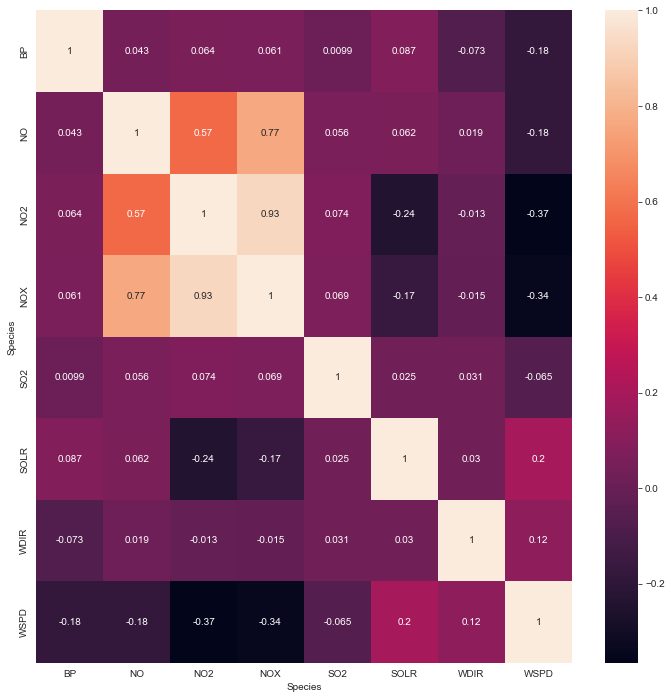

In [28]:
dataplot = sns.heatmap(dataframeF.corr(method = 'pearson'), annot = True)
plt.show()

In [29]:
dataframeF

Species,BP,NO,NO2,NOX,SO2,SOLR,WDIR,WSPD
ReadingDateTime,,,,,,,,
2014-01-01 00:00:00,997.0,0.1,15.1,15.2,2.4,0.0,187.0,4.9
2014-01-01 00:15:00,997.0,0.1,15.1,15.2,2.4,0.0,187.0,4.9
2014-01-01 00:30:00,997.0,0.1,15.1,15.2,2.4,0.0,192.0,3.5
2014-01-01 00:45:00,997.0,0.1,15.1,15.2,2.4,0.0,209.0,3.5
2014-01-01 01:00:00,997.0,0.1,15.1,15.2,2.4,0.0,203.0,3.2
...,...,...,...,...,...,...,...,...
2018-12-31 22:45:00,1029.0,0.0,3.9,3.9,2.3,5.0,282.0,0.2
2018-12-31 23:00:00,1029.0,0.0,3.9,3.9,2.3,5.0,282.0,0.2
2018-12-31 23:15:00,1029.0,0.0,3.9,3.9,2.3,5.0,272.0,0.2


In [30]:
dataframeF.to_csv('preprocessedData.csv')